<a href="https://colab.research.google.com/github/meriemdouider1/mois1-mois2/blob/main/modelisation%20app/test%20(correlation%20test%202).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.metrics import recall_score


In [2]:
Cl = '/content/AXEAPP.xlsx' 
apprentissage= pd.read_excel(Cl, sheet_name=0,header=0,index_col=False, keep_default_na=True)

In [3]:
apprentissage

,AXE11,AXE12,AXE2,AXE3,AXE4,AXE5,Cs_longia
0,-0.001681,0.009907,-0.025728,-0.563805,-0.926993,-0.225636,1
1,-0.001681,0.009907,-0.025728,-0.563805,-0.926993,-0.225636,1
2,-0.000142,0.015543,0.036720,-1.019368,-0.685684,0.067701,0
3,0.000509,0.013638,0.012478,-0.948691,-0.340524,-0.004803,0
4,0.000445,0.013638,0.013898,-0.957960,-0.192580,-0.009190,0
...,...,...,...,...,...,...,...
198,-0.000530,-0.002976,-0.040308,-0.319123,-1.511360,-0.294031,1
199,-0.000194,-0.020561,0.001361,-0.349366,0.577311,-0.129894,1
200,-0.001884,-0.028565,-0.056849,-0.805238,0.515859,-0.327260,1
201,-0.001585,-0.024767,-0.057449,-0.914402,-0.182257,-0.212477,1


In [4]:
Cl2 = '/content/AXETEST.xlsx' 
test= pd.read_excel(Cl2, sheet_name=0,header=0,index_col=False, keep_default_na=True)

In [5]:
test

,AXE11,AXE12,AXE2,AXE3,AXE4,AXE5,Cs_longia
0,-0.000376,0.039668,0.050709,-2.017607,-0.356532,0.521530,1
1,-0.000324,0.010440,0.079680,-0.297156,-0.837061,-0.052202,0
2,-0.002081,0.024057,-0.093550,-0.134580,-1.099443,-0.210005,0
3,-0.000654,0.012049,0.014547,0.526365,-0.243673,0.059436,0
4,-0.000654,0.012049,0.014547,0.526365,-0.243673,0.059416,1
5,0.001365,0.010772,0.047464,0.127182,0.030739,0.186211,0
6,-0.000578,0.009403,-0.004166,0.580982,-0.373012,0.208510,0
7,-0.000465,0.009403,-0.007478,0.562444,-0.373012,0.201738,1
8,-0.000117,0.011040,0.017979,0.762286,-0.209806,0.105139,1
9,0.000090,0.011457,0.016386,0.755765,-0.210714,0.123493,1


In [7]:
X_app = apprentissage.loc[:, apprentissage.columns != 'Cs_longia']
Y_app = apprentissage.Cs_longia
X_test = test.loc[:, test.columns != 'Cs_longia']
Y_test = test.Cs_longia

# XGBOOST

In [8]:
Classifier = XGBClassifier(scale_pos_weight=1,learning_rate=0.5,max_depth=5,n_estimators=150,objective="binary:logistic")

In [9]:
Classifier.fit(X_app,Y_app)

XGBClassifier(learning_rate=0.5, max_depth=5, n_estimators=150)

In [10]:
preds = Classifier.predict(X_test)

In [11]:
preds

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0])

In [12]:
cf_matrix = confusion_matrix(Y_test, preds)
print(cf_matrix)

[[14  6]
 [15 16]]


In [13]:
###Recall
def recall(y_test, preds):
  recall=recall_score(y_test, preds)
  return recall
def MCC(y_test, preds):
  MCC= matthews_corrcoef(y_test, preds) 
  return MCC
### MCC
def MCC(y_test, preds):
  MCC= matthews_corrcoef(y_test, preds) 
  return MCC
### sensibilite
def sensibilite(y_test, preds):
  cf_matrix = confusion_matrix(y_test, preds)
  sensibilite =  (cf_matrix[1,1])/(cf_matrix[1,1]+cf_matrix[1,0])
  return sensibilite
### specifite 
def specifite(y_test, preds):
  cf_matrix = confusion_matrix(y_test, preds)
  specifite =  (cf_matrix[0,0])/(cf_matrix[0,0]+cf_matrix[0,1])
  return specifite 
### kappa
def kappa(y_test, preds):
  value = cohen_kappa_score(y_test, preds)
  return value
### balancedacc
def balancedacc(y_test, preds):
  cf_matrix = confusion_matrix(y_test, preds)
  sen = (cf_matrix[1,1])/(cf_matrix[1,1]+cf_matrix[0,1])
  spe = (cf_matrix[0,0])/(cf_matrix[0,0]+cf_matrix[1,0])
  value = (sen + spe)/2
  return value
def présicion_positive(y_test, preds):
  cf_matrix = confusion_matrix(y_test, preds)
  pre_pos =  (cf_matrix[1,1])/(cf_matrix[1,1]+cf_matrix[0,1])
  return pre_pos
def présicion_négative(y_test, preds):
  cf_matrix = confusion_matrix(y_test, preds)
  pre_pos =  (cf_matrix[0,0])/(cf_matrix[0,0]+cf_matrix[1,0])
  return pre_pos
  
### courbe roc
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

In [15]:
MCC(Y_test, preds)

0.21305837692746682

In [16]:
recall(Y_test, preds)

0.5161290322580645

In [17]:
sensibilite(Y_test, preds)

0.5161290322580645

In [18]:
specifite(Y_test, preds)

0.7

In [19]:
présicion_négative(Y_test, preds)

0.4827586206896552

In [20]:
présicion_positive(Y_test, preds)

0.7272727272727273

In [21]:
balancedacc(Y_test, preds)

0.6050156739811913

In [22]:
kappa(Y_test, preds)

0.20014936519790893

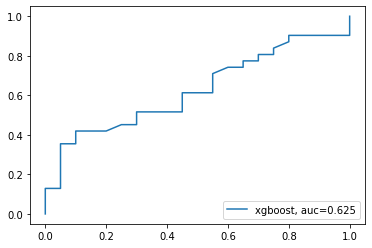

In [23]:
y_pred_proba = Classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="xgboost, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Logistic

In [24]:
Classifier1 = LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced')

In [25]:
Classifier1.fit(X_app,Y_app)

LogisticRegression(class_weight='balanced')

In [26]:
preds1 = Classifier1.predict(X_test)

In [27]:
preds1

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0])

In [28]:
cf_matrix1 = confusion_matrix(Y_test, preds1)
print(cf_matrix1)

[[17  3]
 [16 15]]


In [29]:
MCC(Y_test, preds1)

0.3410996534841953

In [30]:
recall(Y_test, preds1)

0.4838709677419355

In [31]:
sensibilite(Y_test, preds1)

0.4838709677419355

In [32]:
specifite(Y_test, preds1)

0.85

In [33]:
présicion_négative(Y_test, preds1)

0.5151515151515151

In [34]:
présicion_positive(Y_test, preds1)

0.8333333333333334

In [35]:
balancedacc(Y_test, preds1)

0.6742424242424243

In [36]:
kappa(Y_test, preds1)

0.2993492407809111

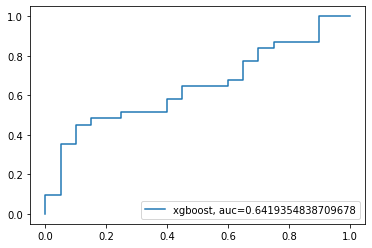

In [37]:
y_pred_proba = Classifier1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="xgboost, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Random_forest

In [38]:
Classifier2 = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=5 ,min_samples_split=3)

In [39]:
Classifier2.fit(X_app,Y_app)

RandomForestClassifier(max_depth=5, min_samples_split=3)

In [40]:
preds2 = Classifier2.predict(X_test)

In [41]:
preds2

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0])

In [42]:
cf_matrix2 = confusion_matrix(Y_test, preds2)
print(cf_matrix2)

[[12  8]
 [15 16]]


In [43]:
MCC(Y_test, preds2)

0.11359236684941296

In [44]:
recall(Y_test, preds2)

0.5161290322580645

In [45]:
sensibilite(Y_test, preds2)

0.5161290322580645

In [46]:
specifite(Y_test, preds2)

0.6

In [47]:
présicion_négative(Y_test, preds2)

0.4444444444444444

In [48]:
présicion_positive(Y_test, preds2)

0.6666666666666666

In [49]:
balancedacc(Y_test, preds2)

0.5555555555555556

In [50]:
kappa(Y_test, preds2)

0.1093394077448746

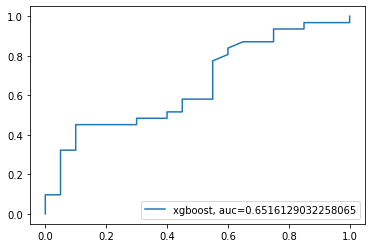

In [51]:
y_pred_proba = Classifier2.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="xgboost, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Gradient_Boostnig

In [52]:
Classifier3 = GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 )

In [53]:
Classifier3.fit(X_app,Y_app)

GradientBoostingClassifier(max_depth=2, max_features=2, min_samples_leaf=2,
                           n_estimators=225, random_state=0, subsample=1)

In [54]:
preds3 = Classifier3.predict(X_test)

In [55]:
preds3

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0])

In [56]:
cf_matrix3 = confusion_matrix(Y_test, preds3)
print(cf_matrix3)

[[14  6]
 [16 15]]


In [57]:
MCC(Y_test, preds3)

0.18240583708018135

In [58]:
recall(Y_test, preds3)

0.4838709677419355

In [59]:
sensibilite(Y_test, preds3)

0.4838709677419355

In [60]:
specifite(Y_test, preds3)

0.7

In [61]:
présicion_négative(Y_test, preds3)

0.4666666666666667

In [62]:
présicion_positive(Y_test, preds3)

0.7142857142857143

In [63]:
balancedacc(Y_test, preds3)

0.5904761904761905

In [64]:
kappa(Y_test, preds3)

0.16888888888888887

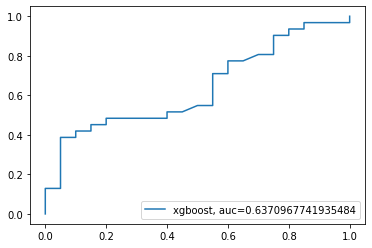

In [65]:
y_pred_proba = Classifier3.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="xgboost, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Gaussian

In [66]:
Classifier4 = GaussianNB()

In [67]:
Classifier4.fit(X_app,Y_app)

GaussianNB()

In [68]:
preds4 = Classifier4.predict(X_test)

In [69]:
preds4

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0])

In [70]:
cf_matrix4 = confusion_matrix(Y_test, preds4)
print(cf_matrix4)

[[16  4]
 [16 15]]


In [71]:
MCC(Y_test, preds4)

0.2866586382313736

In [72]:
recall(Y_test, preds4)

0.4838709677419355

In [73]:
sensibilite(Y_test, preds4)

0.4838709677419355

In [74]:
specifite(Y_test, preds4)

0.8

In [75]:
présicion_négative(Y_test, preds4)

0.5

In [76]:
présicion_positive(Y_test, preds4)

0.7894736842105263

In [77]:
balancedacc(Y_test, preds4)

0.6447368421052632

In [78]:
kappa(Y_test, preds4)

0.2565597667638483

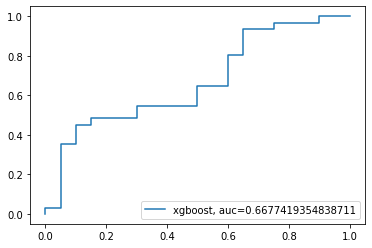

In [79]:
y_pred_proba = Classifier4.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="xgboost, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# KNN

In [124]:
Classifier5 = KNeighborsClassifier(n_neighbors=6)

In [125]:
Classifier5.fit(X_app,Y_app)

KNeighborsClassifier(n_neighbors=6)

In [126]:
preds5 = Classifier5.predict(X_test)

In [127]:
preds5

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0])

In [128]:
cf_matrix5 = confusion_matrix(Y_test, preds5)
print(cf_matrix5)

[[16  4]
 [16 15]]


In [129]:
MCC(Y_test, preds5)

0.2866586382313736

In [130]:
recall(Y_test, preds5)

0.4838709677419355

In [131]:
sensibilite(Y_test, preds5)

0.4838709677419355

In [132]:
specifite(Y_test, preds5)

0.8

In [133]:
présicion_négative(Y_test, preds5)

0.5

In [134]:
présicion_positive(Y_test, preds5)

0.7894736842105263

In [135]:
balancedacc(Y_test, preds5)

0.6447368421052632

In [136]:
kappa(Y_test, preds5)

0.2565597667638483

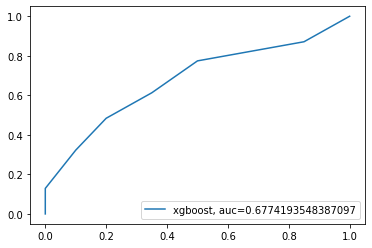

In [137]:
y_pred_proba = Classifier5.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="xgboost, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# MLPC

In [138]:
from sklearn.neural_network import MLPClassifier

In [139]:
Classifier6 = MLPClassifier(hidden_layer_sizes=100,max_iter=300)

In [140]:
Classifier6.fit(X_app,Y_app)

MLPClassifier(hidden_layer_sizes=100, max_iter=300)

In [141]:
preds6 = Classifier6.predict(X_test)

In [142]:
preds6

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0])

In [143]:
cf_matrix6 = confusion_matrix(Y_test, preds6)
print(cf_matrix6)

[[18  2]
 [17 14]]


In [144]:
MCC(Y_test, preds6)

0.36997010714966116

In [145]:
recall(Y_test, preds6)

0.45161290322580644

In [146]:
sensibilite(Y_test, preds6)

0.45161290322580644

In [147]:
specifite(Y_test, preds6)

0.9

In [148]:
présicion_négative(Y_test, preds6)

0.5142857142857142

In [149]:
présicion_positive(Y_test, preds6)

0.875

In [150]:
balancedacc(Y_test, preds6)

0.6946428571428571

In [151]:
kappa(Y_test, preds6)

0.31032028469750883

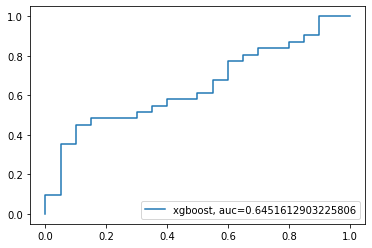

In [152]:
y_pred_proba = Classifier6.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="xgboost, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# SVM

In [153]:
Classifier7 = svm.SVC(kernel='rbf',gamma=0.05,C=12)

In [154]:
Classifier7.fit(X_app,Y_app)

SVC(C=12, gamma=0.05)

In [155]:
preds7 = Classifier7.predict(X_test)

In [156]:
preds7

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0])

In [157]:
cf_matrix7 = confusion_matrix(Y_test, preds7)
print(cf_matrix7)

[[17  3]
 [18 13]]


In [158]:
MCC(Y_test, preds7)

0.28341746740363954

In [159]:
recall(Y_test, preds7)

0.41935483870967744

In [160]:
sensibilite(Y_test, preds7)

0.41935483870967744

In [161]:
specifite(Y_test, preds7)

0.85

In [162]:
présicion_négative(Y_test, preds7)

0.4857142857142857

In [163]:
présicion_positive(Y_test, preds7)

0.8125

In [164]:
balancedacc(Y_test, preds7)

0.6491071428571429

In [165]:
kappa(Y_test, preds7)

0.2377224199288256

In [166]:
from sklearn.metrics import roc_auc_score

In [167]:
roc_auc_score(Y_test, Classifier7.decision_function(X_test))

0.6709677419354839

# Correlation 

In [168]:
def eta_squared(x,y):
    moyenne_y = np.mean(y)
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': np.mean(yi_classe)})
    SCT = np.sum([(yj-moyenne_y)**2 for yj in y])
    SCE = np.sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

# cs_longia

In [169]:
Cl1 = '/content/apprentissage.xlsx' 
data1=pd.read_excel(Cl1, sheet_name=0,header=0,index_col=False, keep_default_na=True)

In [170]:
del data1["Source"] 
del data1["CodeSite"] 
data1

,X_long,Y_lat,Cs_longia,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-13.188370,27.132950,1,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.7,17.299999,18.799999,19.900000,19.400000,17.799999,15.3,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
1,-13.188370,27.132950,1,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.7,17.299999,18.799999,19.900000,19.400000,17.799999,15.3,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.185620,27.157940,0,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.0,17.600000,19.000000,20.200001,19.600000,18.100000,15.5,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
3,-13.201560,27.165070,0,0.000000,0.000000,0.000000,0.000000,0.299265,0,74,0,0,0,0,0,0,0,0,26,2490,520,50,30,44,0,0,44,1920,3010,612,202,202,0,15266,299,121,23,73,12,0,...,29.400000,27.799999,25.299999,22.900000,12.2,13.0,14.3,14.9,15.8,17.400000,18.900000,20.000000,19.500000,18.000000,15.4,13.0,1.20,1.34,1.44,1.53,1.65,1.87,2.06,2.14,2.12,1.98,1.63,1.41,4.3,4.5,5.1,5.6,5.8,6.2,6.6,6.3,5.7,4.6,3.8,3.9
4,-13.207000,27.165000,0,0.000000,0.000000,0.000000,0.000000,0.299265,0,74,0,0,0,0,0,0,0,0,26,2490,520,50,30,44,0,0,44,1920,3010,612,202,202,0,15266,299,121,23,73,12,0,...,29.400000,27.799999,25.299999,22.900000,12.2,13.0,14.3,14.9,15.8,17.400000,18.900000,20.000000,19.500000,18.000000,15.4,13.0,1.20,1.34,1.44,1.53,1.65,1.87,2.06,2.14,2.12,1.98,1.63,1.41,4.3,4.5,5.1,5.6,5.8,6.2,6.6,6.3,5.7,4.6,3.8,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,-5.071290,35.307710,1,3.588955,161.931808,19.917032,7.432297,0.552120,0,0,0,45,0,0,0,5,49,0,0,1560,500,130,20,79,5,0,84,1190,2160,735,127,157,0,14845,613,103,8,92,3,0,...,24.400000,20.200001,16.900000,13.600000,3.5,4.2,6.3,8.8,11.0,15.000000,19.100000,19.000000,16.100000,11.900000,8.6,5.2,0.87,0.92,0.96,1.04,1.18,1.38,1.53,1.61,1.51,1.30,1.08,0.97,3.8,4.2,5.2,4.8,4.3,4.0,3.7,3.8,4.1,4.2,3.8,3.8
199,-5.533333,35.550000,1,7.208185,162.869507,3.685802,18.440529,0.890540,0,0,0,0,0,9,8,0,82,0,0,1590,690,150,60,84,4,1,89,950,2410,715,155,205,0,14917,561,86,8,93,2,0,...,26.400000,22.799999,19.600000,16.400000,7.2,7.9,9.9,11.6,13.8,17.400000,20.600000,20.900000,18.900000,15.300000,12.1,8.9,1.03,1.08,1.14,1.21,1.40,1.67,1.85,1.92,1.81,1.55,1.27,1.13,2.8,3.0,3.8,3.6,3.5,3.3,3.2,3.1,3.0,2.9,2.7,3.3
200,-5.325286,35.685852,1,7.352805,115.615433,7.495493,18.920124,0.577831,0,21,1,25,0,

In [171]:
data1["Cs_longia"]

0      1
1      1
2      0
3      0
4      0
      ..
198    1
199    1
200    1
201    1
202    1
Name: Cs_longia, Length: 203, dtype: int64

In [172]:
A1 = data1.loc[:, data1.columns != 'Cs_longia']
x1 = data1.Cs_longia

In [173]:
T1=A1.columns

In [174]:
T1

Index(['X_long', 'Y_lat', 'Bovins', 'Volaille', 'Caprins', 'Ovins', 'Equides',
       'Coniferes', 'ZoneAride', 'ZonePel',
       ...
       'Vent_Mars', 'Vent_Avril', 'Vent_Mai', 'Vent_Juin', 'Vent_Juill',
       'Vent_Aout', 'Vent_Sept', 'Vent_Oct', 'Vent_Nov', 'Vent_Dec'],
      dtype='object', length=225)

In [175]:
lst1=[]

In [176]:
for variable in T1 :
  y=A1[variable]
  print("variable : ",variable,"/corrélation:",eta_squared(x1,y))
  lst1.append([variable,eta_squared(x1,y)])

variable :  X_long /corrélation: 0.023944058994534487
variable :  Y_lat /corrélation: 0.035944271702778564
variable :  Bovins /corrélation: 0.02204822089711176
variable :  Volaille /corrélation: 0.0008687759827605919
variable :  Caprins /corrélation: 0.019523126766361146
variable :  Ovins /corrélation: 0.029713046902984583
variable :  Equides /corrélation: 0.027012759787406304
variable :  Coniferes /corrélation: 0.0006573961942511391
variable :  ZoneAride /corrélation: 0.0549261421946064
variable :  ZonePel /corrélation: 1.691727890138276e-05
variable :  Lesfeuillus /corrélation: 0.007605065749125258
variable :  Caduc /corrélation: 5.3108455154205965e-05
variable :  Autres /corrélation: 0.0027079860712491233
variable :  Arbrisseau /corrélation: 0.029442114850894638
variable :  Pl_herb /corrélation: 0.017275262265974537
variable :  VegCul /corrélation: 0.050212892691137136
variable :  VegInond /corrélation: 0.0010018440211573122
variable :  ZoneUrbaine /corrélation: 0.01536357045609081


In [177]:
lst1

[['X_long', 0.023944058994534487],
 ['Y_lat', 0.035944271702778564],
 ['Bovins', 0.02204822089711176],
 ['Volaille', 0.0008687759827605919],
 ['Caprins', 0.019523126766361146],
 ['Ovins', 0.029713046902984583],
 ['Equides', 0.027012759787406304],
 ['Coniferes', 0.0006573961942511391],
 ['ZoneAride', 0.0549261421946064],
 ['ZonePel', 1.691727890138276e-05],
 ['Lesfeuillus', 0.007605065749125258],
 ['Caduc', 5.3108455154205965e-05],
 ['Autres', 0.0027079860712491233],
 ['Arbrisseau', 0.029442114850894638],
 ['Pl_herb', 0.017275262265974537],
 ['VegCul', 0.050212892691137136],
 ['VegInond', 0.0010018440211573122],
 ['ZoneUrbaine', 0.01536357045609081],
 ['Moy_IRM', 0.07328282895734205],
 ['Amp1_IRM', 0.02324109851472724],
 ['Amp2_IRM', 0.0035470241647200724],
 ['Amp3_IRM', 0.06095564509600847],
 ['VarT_ann_IRM', 0.001845692610170255],
 ['VarT_bi_IRM', 0.0009017950840033129],
 ['VarT_tri_IRM', 0.017087442138443015],
 ['VarT_Cy_IRM', 0.002096103766208842],
 ['Min_IRM', 0.09125724350897992],

In [178]:
df1 = pd.DataFrame(lst1, columns = ['variable','corrélation'])
print(df1)

      variable  corrélation
0       X_long     0.023944
1        Y_lat     0.035944
2       Bovins     0.022048
3     Volaille     0.000869
4      Caprins     0.019523
..         ...          ...
220  Vent_Aout     0.035401
221  Vent_Sept     0.061638
222   Vent_Oct     0.047268
223   Vent_Nov     0.014858
224   Vent_Dec     0.048320

[225 rows x 2 columns]


In [179]:
df1.to_excel("cs_longia_apprentissage_corrélation.xlsx")  